## Artificial neural networks: An example implementation in Python 3 with numpy and matplotlib

### Introduction

[Artificial neural networks](https://en.wikipedia.org/wiki/Artificial_neural_network) are a class of supervised machine learning algorithms that are based on the biological concept of how neurons are connected in the brain. These "neurons" (or units) are usually organized into interconnected layers with one input layer, one output layer, and one or more "hidden" layers in between. Each layer consists of a set of units.

Intuitively, the size of the input layer depends on the number of input features and the size of the output layer depends on the size of the desired output being calculated (e.g. a multi-class classifcation problem should output one unit for each class as a 0 or 1). The hidden layers can have any number of units contained within. Choosing the number and size of the hidden layers is up to you and ultimately impacts performance. For example, having more hidden layers enables the detection of more complex decision boundaries but comes at the price of being more computationally intensive. Similarly, more complex decision boundaries tend to have a high variance and low bias, and thus have a tendancy to overfit the training data and not generalize well to testing data. Determining the ideal number and size of the hidden layers for your specific problem will usually involve some trial and error as you find the right balance of model qualities to suit your application.

Passing data into the network to receive an output is known as forward propagation. This involves applying a weight matrix and activation function to the data between each sequential layer. In contrast, a technique known as [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) is used to calculate the partial derivatives of a cost fucntion with respect to each of the weights. The results of backpropagation are then used to minimize the cost function using an optimzation algorithm such as gradient descent.

First we'll go through the theory and then jump into some code.

### Network definitions

Let's define some terms that describe the structure of our network:

* $X$ is our input feature vector $[x_0, x_1, ... x_m]$

* $y$ is our vector of output labels where each position in the vector represents a class

* $K$ is the number of elements in our output vector

* $L$ is the number of layers including the input and output layers

* $s_l$ is the number of non-bias units in layer $l$

* $\Theta^{(l)}$ is a matrix of weights mapping the units of layer $l$ to layer $l+1$ of shape $s_{l+1}$ by $s_l + 1$

As data is passed from one layer to the next, it is multiplied by the corresponding weight matrix $\Theta$, and an activation function $g(z)$ is applied elementwise to obtain a vector of activation values $a^{(l)}$ for the new layer. Common activation functions include the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) and the [hyperbolic tangent function](https://en.wikipedia.org/wiki/Hyperbolic_function).

### Forward propagation (the easy part)

Mathematically, forward propagation is carried out like so:

1\. The activation of the input layer is simply the input.

$$a_i^{(1)} = x_i$$

2\. To move to the next layer, we first apply the weights to the activation of our current layer.

$$z_i^{(l + 1)} = \Theta^{l}a_i^{l}$$

3\. The activation of the next layer is then obtained by applying our activation function.

$$a_i^{(l)} = g(z_i^{(l)})$$

4\. This process is repeated until we reach the final layer $L$ where our hypothesis is computed as the activation of layer $L$.

$$h_\Theta(x) = a^{(L)}$$

### Cost function

Like linear regression and logistic regression, training involves minimizing a cost function. For neural networks this is no different. The cost function we seek to minimize when training our network is shown below:

$$J(\Theta) = \frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K\left[-y_k^{(i)}log((h_\Theta(x^{(i)}))_k)-(1 -y_k^{(i)})log(1-(h_\Theta(x^{(i)}))_k)\right] + \frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}}(\Theta_{j,i}^{(l)})^2$$

This looks intimidating. Let's break it down into less intimidating, more intuitive components. There are basically two terms in this equation. The first half has two nested summation terms that sum the error for all training examples $m$ and for all output nodes $k$. If you are familiar with logistic regression, you might also notice that the term being summed over here is essentially the same but generalized for a neural network, which makes sense:

$$\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K\left[-y_k^{(i)}log((h_\theta(x^{(i)}))_k)-(1 -y_k^{(i)})log(1-(h_\theta(x^{(i)}))_k)\right]$$

The second term is our regularization term with $\lambda$ representing our regularization parameter. This term penalizes for having exceedingly large weights and includes only the non-bias $\Theta$ terms:

$$\frac{\lambda}{2m}\sum_{l=1}^{L-1}\sum_{i=1}^{s_l}\sum_{j=1}^{s_{l+1}}(\Theta_{j,i}^{(l)})^2$$

Our cost function is not so intimidating now that we know what each part does. This should make sense intuitively. The total cost for a given choice of $\Theta$ accounts for the differences between the predicted labels and actual labels. It also introduces regularization so that after training our model can generalize well to new unseen data.

Now, to minimize this function using an algorithm such as gradient descent, we need to know the partial derivatives of $J(\Theta)$ with respect to each of the $\Theta$ terms. In other words, we need to find:

$$\frac{\partial}{\partial\Theta_{j,i}^{(l)}}J(\Theta)$$

How do we do that? Backpropagation!

### Backpropagation (the hard part)

Backpropgation is used to calculate the partial derivatives of the cost function $J(\Theta)$ with respect to each weight. The way this is done is by taking the output of our network, stepping backwards through each layer, and calculating the "error" of each unit in each layer. Just as we represented the activation of a unit with $a_i^{(l)}$, we will similarly represent the "error" of that node using $\delta_i^{(l)}$. What this term represents is the difference between our calculated activation value and the "correct" activation value which is based on the labels in our training set. How we arrive at the equations below involves a lengthy derivation which is beyond the scope of this notebook (INSERT LINKS).

In it's general form, the backpropagation algorithm goes like this:

1\. Calculate the error in the output layer using the training set labels.

$$\delta_i^{L} = a_i^{L} - y_i$$

2\. Step backwards through each layer to obtain the corresponding error values, where $g^\prime$ represents the derivative of your activation function (here the $.*$ represents element-wise multiplication).

$$\delta_i^{(l)} = ((\Theta^{(l)})^T\delta^{l+1}) .* g^\prime(z^{(l)})$$

3\. Once you've computed the error values for all layers back to and including layer 2 (there is no error term for layer 1, the input layer). You can assemble them into a single term.

$$\Delta_{ij}^{(l)} = a_j^{(l)}\delta_i^{(l+1)}$$

4\. Finally, you have your partial derivative terms, calculated across all training examples $m$. (Omit the $\Theta$ term when $j = 0$, so as to not regularize the bias).

$$\frac{\partial}{\partial\Theta_{ij}^{(l)}}J(\Theta) = D_{ij}^{(l)} = \frac{1}{m}\Delta_{ij}^{(l)} + \frac{\lambda}{m}\Theta_{ij}^{(l)}$$

Now, when we go to run gradient descent, our updates to $\Theta$ will look like the following using our newly-assembled $\Delta$ term (remember to omit the regularization term in $D$ when updating the bias):

$$\Theta_{ij}^{(l)} := \Theta_{ij}^{(l)} - \alpha D_{ij}^{(l)}$$

### Theta initialization

Another consideration when implementing a neural network is to properly initialize the weights. If your $\Theta$ terms are initialized to all zeros, then the network will fail to learn. A good choice is to initialize the weights to random numbers between $[-\epsilon, \epsilon]$.

$$\epsilon = \frac{\sqrt{6}}{\sqrt{Loutput+Linput}}$$

Where $Loutput$ and $Linput$ represent the dimensions of the $\Theta$ term being initialized.

### An example network

For the purposes of this example, we will implement an artificial neural network with 3 input units (the data has two features and we include one bias unit), two hidden layers with 5 units and one bias unit, and two output units. The sigmoid function will be used as our activation function. We will use the backpropagation algorithm and gradient descent to train the network. This translates to the following:

* Our training data $X$ will have the shape $m$ x 2 where $m$ is the number of training examples. Similarly our training data labels $y$ will be $m$ x 2 as we have a two-class problem where outputs are either [0, 1] or [1, 0].

* Our output layer will have two nodes, one for each class. As such our output vector $y$ will have $K = 2$ elements.

* As we have one input layer, two hidden layers, and one output layer, we have $L = 4$.

* For each layer $l$, the number of units will be:

    * $s_1 = 2$ (two input features, not counting one bias unit)

    * $s_2 = 5$ (five hidden units, not counting one bias unit)

    * $s_3 = 5$ (five hidden units, not counting one bias unit)
    
    * $s_4 = 2$ (two output classes)

* Thus we will have three weight matrices, $\Theta^{(1)}$ with shape 5 x 3, $\Theta^{(2)}$ with shape 5 x 6, and $\Theta^{(3)}$ with shape 2 x 6. Note their dimensions as they do not map to the bias units of the next layer. Their dimensions are $s_{l+1}$ by $s_l + 1$.

### Setting up our network

In [1]:
import numpy as np
np.random.seed(0)
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Let's set some variables and define some functions to carry out the math we've laid out above. First is our activation function $g(z)$ (the sigmoid function) and it's derivative $g^\prime(z)$.

In [2]:
def sigmoid(z):
    """Applies the sigmoid function element-wise to the input array z."""
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    """Applies the derivative of the sigmoid function element-wise to the input array z."""
    return sigmoid(z) * (1 - sigmoid(z))

Forward propagation function that returns $z_i^{(l)}$ and $a_i^{(l)}$. We'll store them in a dict so the layer numbering in the math matches that of our code. This helps make the code easier to debug since the layer numbers ($l$) will correspond to the key values in our code.

In [3]:
def forward_prop(X, Thetas):
    """Takes input training data X and weight matrices Thetas, performs forward propagation,
    and returns (Z, A). The output labels are the last row in the returned matrix A."""
    
    L = len(Thetas) + 1
    m = X.shape[0]
    
    # Dicts for storing our calculated values
    Z = {}
    A = {}
    # Add bias column and set first layer values to be X
    X = np.append(np.ones([X.shape[0], 1]), X, axis=1)
    A[1] = X
    layer = A[1]
    
    # Iterate through each layer, applying weights,
    # the activation function, and storing values
    for i in range(1, L):
        z = layer.dot(Thetas[i].T)
        a = sigmoid(z)
        
        # Only add bias layer and set up next layer if there is a next layer
        if i != (len(Thetas)):
            a = np.append(np.ones([m, 1]), a, axis=1)
            layer = a
        
        # Store values
        A[i+1] = a
        Z[i+1] = z
        
    return Z, A

A shortened version of our forward propagation to quickly output the labels rather than $z_i^{(l)}$ and $a_i^{(l)}$.

In [4]:
def predict(X, Thetas):
    m = X.shape[0]
    L = len(Thetas) + 1
    a = X
    for i in range(1, L):
        z = np.append(np.ones([m, 1]), a, axis=1)
        a = sigmoid(z.dot(Thetas[i].T))
        z = a
        
    return np.argmax(a, axis=1)
    
    #z1 = np.append(np.ones([m, 1]), X, axis=1)
    #h1 = sigmoid(z1.dot(Thetas[1].T))
    #z2 = np.append(np.ones([m, 1]), h1, axis=1)
    #h2 = sigmoid(z2.dot(Thetas[2].T))
    #z3 = np.append(np.ones([m, 1]), h2, axis=1)
    #h3 = sigmoid(z3.dot(Thetas[3].T))
    
    #return np.argmax(h3, axis=1)

Our cost function from earlier.

In [5]:
def calculate_cost(X, y, Thetas, lamb=0):
    """Function to calculate the cost function of a neural network given X training data and a list
    of weight parameters Thetas."""

    m = X.shape[0]
    n_labels = np.unique(y).shape[0]
    
    # Perform forward propagation
    Z, A = forward_prop(X, Thetas)
    # Hypothesis = model output, rehshape to numpy array
    h = A[len(Thetas) + 1]
    
    y_mat = np.eye(n_labels)[y,:]
    
    # Calculate cost, NOT including regularization, these multiplications are element-wise
    J = - (1 / m) * (y_mat * np.log(h) + (1 - y_mat) * np.log(1 - h)).sum()
    
    if lamb > 0:
        # Calculate regluarization over non-bias theta terms
        reg = (lamb / (2 * m)) * sum([np.sum(np.array(Thetas[i][:,1:]) ** 2) for i in Thetas.keys()])
        return J + reg
    else:
        return J

The back propagation function. I'll admit it took me a bit to get this one working correctly!

In [6]:
def backpropagation(X, y, A, Z, Thetas, lamb=0.0):
    """Performs backpropagation given the training data, results
    from forward propagation, and weights. Regulariation is optional."""

    # Set some useful variables
    L = len(Thetas) + 1
    n_labels = len(np.unique(y))
    m = X.shape[0]
    
    # Transform labels into an array where each class
    # is either a 0 or 1 in an m by 2 array
    y_mat = np.eye(n_labels)[y,:]
    
    # This variable is where we'll store our "error" values
    d = {}
    # Set the error of the last layer by comparing
    # previously calculated predictions with the actual labels
    d[L] = A[L] - y_mat
    
    Deltas = {} # Our error accumulator variable
    Theta_regs = {} # Regularization terms of the cost function derivative
    Theta_grads = {} # The final partial derivative terms
    
    # Step backwards through the network
    for i in range(1, L):
        if L - i > 1: # Calculate error for all but the first layer
            d[L-i] = d[L-i+1].dot(Thetas[L-i][:,1:]) * sigmoid_gradient(Z[L-i])
        
        # Accumulate error terms
        Deltas[L-i] = d[L-i+1].T.dot(A[L-i])
        # Calculate regularization terms, but ignore bias thetas
        # To ignore bias thetas, note the appended zeros combined with
        # the `Thetas[layer][:,1:]` array indexing
        Theta_regs[L-i] = np.append(np.zeros([Thetas[L-i].shape[0], 1]), (lamb / m) * Thetas[L-i][:,1:], axis=1)
        # Assemble the final partial derivatives
        Theta_grads[L-i] = (1 / m) * Deltas[L-i] + Theta_regs[L-i]
    
    return Theta_grads

Before getting into defining our example network, here's a function we will find useful later on to visualize the decision boundary of our model.

In [7]:
def plot_decision_boundary(X, y, Thetas, steps=1000, cmap=plt.cm.Paired):
    """Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label."""

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = predict(np.c_[xx.ravel(), yy.ravel()], Thetas)

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=plt.cm.Paired)

    # Get predicted labels on training data and plot
    train_labels = predict(X, Thetas)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Paired)
    
    return fig, ax

Set some variables describing the network structure:

In [8]:
L = 4 # There are four layers in our network
s1 = 2 # Two units in layer 1 (input features), plus one bias
s2 = 5 # Five units in layer 2 (hidden layer 1), plus one bias
s3 = 5 # Five units in layer 3 (hidden layer 2), plus one bias
s4 = 2 # Two units in layer 4 (output layer), no bias term
layers = [s1, s2, s3, s4]

Initialize the weights. Again we'll put them in a dict where the key is the layer that it belongs to.

In [9]:
Thetas = {}

# Initialize random random weights based on size of layers
for i in range(1, len(layers)):
    epsilon = np.sqrt(6) / np.sqrt(layers[i] + layers[i-1] + 1)
    Thetas[i] = (np.random.rand(layers[i], layers[i-1] + 1) - 0.5) * epsilon

for i in Thetas.keys():
    print('Theta%d shape: %d by %d' % (i, Thetas[i].shape[0], Thetas[i].shape[1]))

Theta1 shape: 5 by 3
Theta2 shape: 5 by 6
Theta3 shape: 2 by 6


Finally, here is the function we will use to train our model, returning the "trained" $\Theta$ matrices and the cost per iteration as we trained.

In [10]:
def train_network(X_train, y_train, Initial_thetas, alpha=0.5, max_iter=1000):
    """This function trains our network defined by the weight paramters theta"""
    
    m = X_train.shape[0]
    costs = np.zeros(max_iter) # Accumulate costs
    
    Thetas = Initial_thetas.copy()
    
    for n in range(max_iter):
        Z, A = forward_prop(X_train, Thetas)
        cost = calculate_cost(X_train, y_train, Thetas)
        costs[n] = cost
        Theta_grads = backpropagation(X_train, y_train, A, Z, Thetas)
        for i in range(1, len(Thetas) + 1):
            Thetas[i] = Thetas[i] - alpha * Theta_grads[i]
            
    return Thetas, costs

### Generating a data set

((1000,), (1000, 2))

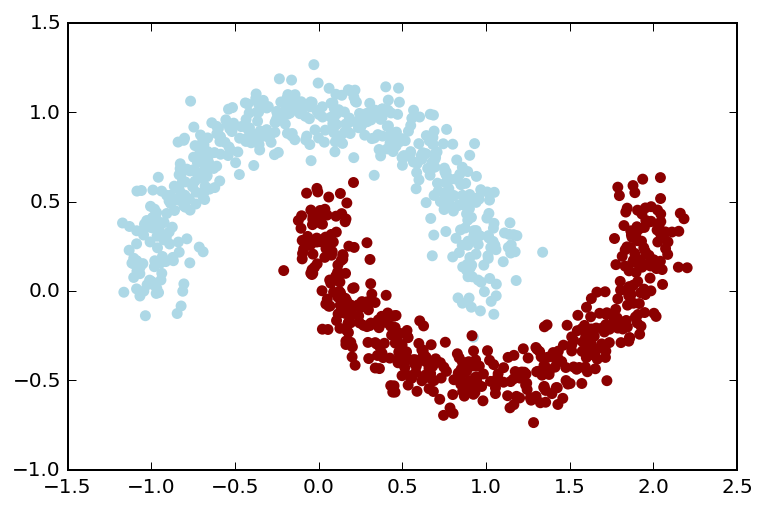

In [11]:
X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=0)
colors = ['darkred' if label == 1 else 'lightblue' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

### Training the model: Take 1

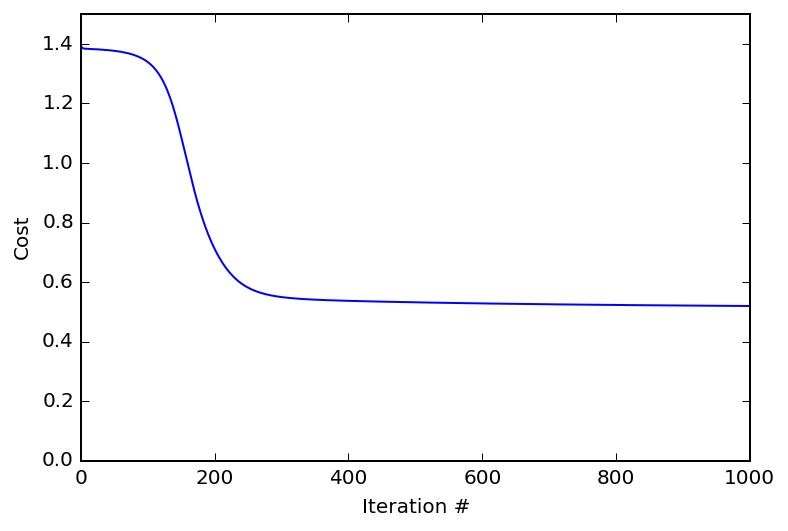

In [12]:
Trained_thetas, costs = train_network(X, y, Thetas, alpha=0.5, max_iter=1000)

fig, ax = plt.subplots()
ax.plot(costs)
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_ylabel('Cost')
ax.set_xlabel('Iteration #');

So our cost is decreasing with each iteration of gradient descent, and seems to have converged to a minimum. These are both good things. Let's take a look at the decision boundary of our model.

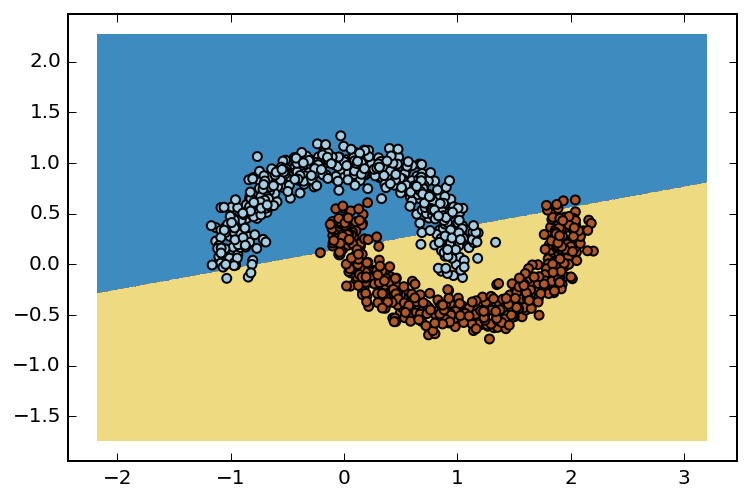

In [13]:
plot_decision_boundary(X, y, Trained_thetas);

Ah, our network seems to have only drawn a straight line decision boundary. Usually, this is the behavior we would get with logisitic regression or with a neural network containing only one hidden layer. Perhaps our cost function hasn't completely converged?

Let's try train our model again, but this time for a bit longer. We'll go with 5,000 iterations this time instead of only 1,000.

### Training the model: Take 2

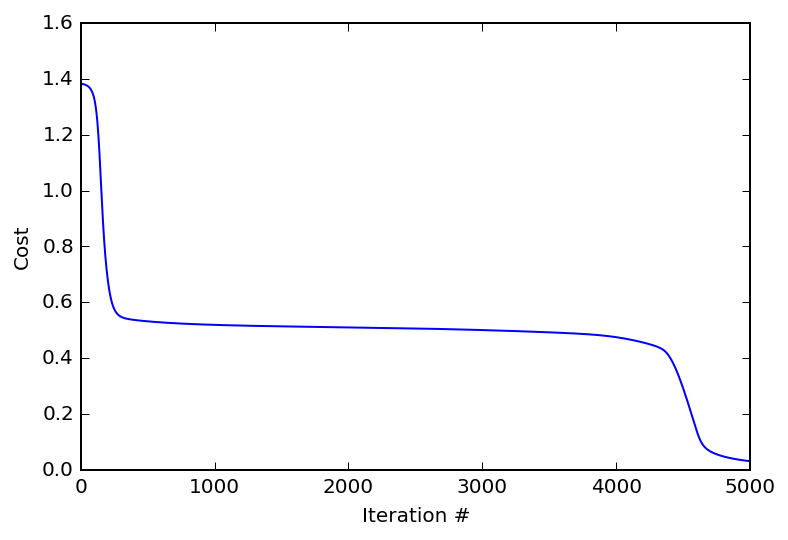

In [14]:
Trained_thetas, costs = train_network(X[:500], y[:500], Thetas, alpha=0.5, max_iter=5000)

fig, ax = plt.subplots()
ax.plot(costs)
ax.set_ylim(0, ax.get_ylim()[1])
ax.set_ylabel('Cost')
ax.set_xlabel('Iteration #');

Our cost seems pretty low at the end of this extended training. Now for the decision boundary...

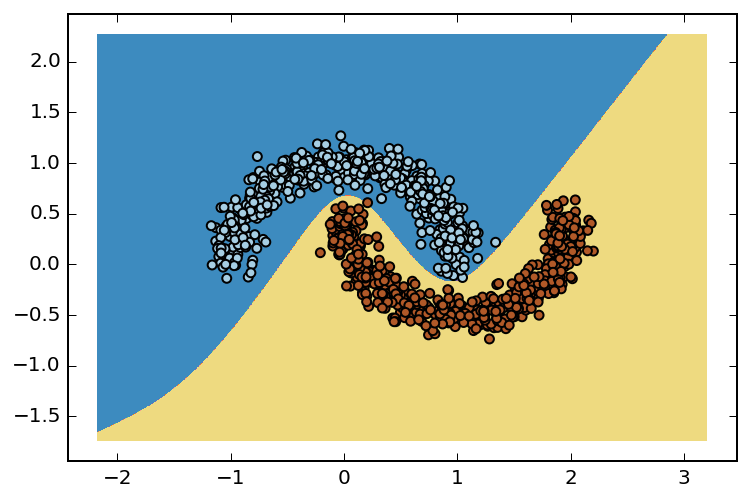

In [15]:
plot_decision_boundary(X, y, Trained_thetas);

Nice! Now our model has a non-linear decision boundary and our cost function is close to zero, meaning the model we have fits this training set very well.

### Concluding remarks

You can see that our model was able to fit data that's not linearly separable *without* introducing additional features. This is a key advantage of using artificial neural networks compared to simple logistic regression. If we wanted these kinds of results with logistic regression, we would probably have to introduce polynomial features (such as $x_1^n$, $x_2^n$, or $x_1x_2$) in addition to what we already have. Generally, the more hidden layers used, the more complex boundaries our network is able to construct.

One topic I haven't yet touched on is cross validation, which is a method for evaluating how well a trained model will generalize to unseen data. Even though our final trained model fits our training data very well, that doesn't mean that it will perform well in classifying new data. I plan to give an example of how to cross-validate your model in a future notebook.